# Shark attacks

IMPORTING THE LIBRARIES AND THE DATA INTO A PANDAS DATAFRAME

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

df = pd.read_excel("GSAF5.xls")

In [2]:
!pip install seaborn


# 2. CLEANING THE DATA

# 2.1 Descriptive Analysis

In [3]:
pd.options.display.max_columns = None  
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,Minor cuts and abrasions,N,0830hrs,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,None reported damage to board,N,1145hrs,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19th January,2026.0,Unprovoked,Australia,NSW,North Steyne,Surfing,Andre de Ruyter,M,27,Serious Leg injuries,N,1820hrs,5m shark species not determined,9 News: Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18th January,2026.0,Unprovoked,Australia,NSW,Nielsen Park Vaucluse Sydney Harbour,Jumping off rocks,Nico Antic,M,12,Serious leg injuries,Y,1620hrs,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10th January,2026.0,Unprovoked,Australia,NSW,Avalon Beach,Surfing,Paul Stanton,M,?,Puncture mark to left thumb,N,0540hrs,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#checking number of rows and columns in the dataset
df.shape

(7070, 23)

In [5]:
#checling the column names in the dataset
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [4]:
#viewing the data types of each column 

print("\nView datatypes:\n")
df.info()
df.dtypes


View datatypes:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7070 entries, 0 to 7069
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            7070 non-null   object 
 1   Year            7068 non-null   float64
 2   Type            7052 non-null   object 
 3   Country         7020 non-null   object 
 4   State           6583 non-null   object 
 5   Location        6503 non-null   object 
 6   Activity        6485 non-null   object 
 7   Name            6851 non-null   object 
 8   Sex             6491 non-null   object 
 9   Age             4075 non-null   object 
 10  Injury          7035 non-null   object 
 11  Fatal Y/N       6509 non-null   object 
 12  Time            3543 non-null   object 
 13  Species         3939 non-null   object 
 14  Source          7050 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6794 non-null   object 
 17  href           

Date               object
Year              float64
Type               object
Country            object
State              object
Location           object
Activity           object
Name               object
Sex                object
Age                object
Injury             object
Fatal Y/N          object
Time               object
Species            object
Source             object
pdf                object
href formula       object
href               object
Case Number        object
Case Number.1      object
original order    float64
Unnamed: 21        object
Unnamed: 22        object
dtype: object

In [7]:
# count missing values in each column
print("\nCount missing values in each column:\n")
print(df.isnull().sum())


Count missing values in each column:

Date                 0
Year                 2
Type                18
Country             50
State              487
Location           567
Activity           585
Name               219
Sex                579
Age               2995
Injury              35
Fatal Y/N          561
Time              3527
Species           3131
Source              20
pdf                271
href formula       276
href               274
Case Number        272
Case Number.1      273
original order     271
Unnamed: 21       7069
Unnamed: 22       7068
dtype: int64


In [8]:
# amount of unique values for each column
unique_counts = df.nunique()
print("\nNumber of unique values for each column:")
print(unique_counts)


Number of unique values for each column:
Date              6110
Year               261
Type                13
Country            251
State              944
Location          4616
Activity          1610
Name              5789
Sex                 10
Age                251
Injury            4183
Fatal Y/N           12
Time               473
Species           1737
Source            5401
pdf               6789
href formula      6784
href              6776
Case Number       6777
Case Number.1     6775
original order    6797
Unnamed: 21          1
Unnamed: 22          2
dtype: int64


In [9]:
#code for counting NaN values in each column
df.isna().sum()

Date                 0
Year                 2
Type                18
Country             50
State              487
Location           567
Activity           585
Name               219
Sex                579
Age               2995
Injury              35
Fatal Y/N          561
Time              3527
Species           3131
Source              20
pdf                271
href formula       276
href               274
Case Number        272
Case Number.1      273
original order     271
Unnamed: 21       7069
Unnamed: 22       7068
dtype: int64

In [10]:
#code for counting unique values in the "Activity" column and then printing the top 5 most common activities
activities_count = df["Activity"].value_counts()
top_five_sports = {activity: count for activity, count in activities_count.nlargest(5).items()}
print(f"The top 5 activities are: \n{activities_count}")

The top 5 activities are: 
Activity
Surfing                                          1146
Swimming                                         1011
Fishing                                           494
Spearfishing                                      391
Wading                                            178
                                                 ... 
Floating on a small orange raft                     1
Filming & feeding captive sharks                    1
Attempting to drive shark away from the beach       1
Spearfishing / scuba diving                         1
Wreck of  large double sailing canoe                1
Name: count, Length: 1610, dtype: int64


In [11]:
#too many unique values, so we need to clean and standardize the data
df["Activity"].unique() 

array(['Surfing', 'Jumping off rocks', 'Snorkeling', ...,
       'Crew swimming alongside their anchored ship',
       '4 men were bathing', 'Wreck of  large double sailing canoe'],
      shape=(1611,), dtype=object)

In [12]:
#code for counting unique values in the "Injury" column and then printing the top 5 most common injuries
injury_count = df["Injury"].value_counts()
top_five_inuries = {injury: count for injury, count in injury_count.nlargest(5).items()}
print(f"The top 5 injuries are: \n{injury_count}")

The top 5 injuries are: 
Injury
FATAL                                                                   863
Foot bitten                                                             100
Survived                                                                 97
No injury                                                                85
Leg bitten                                                               81
                                                                       ... 
Right wrist  & left arm lacerated                                         1
Puncture wounds on shin                                                   1
Left hand, foot severed &  left calf & arm bitten                         1
Single puncture wound on the foot                                         1
FATAL. "Shark bit him in half, carrying away the lower extremities"       1
Name: count, Length: 4183, dtype: int64


In [13]:
#code for counting unique values in the "Type" column
type_count = df["Type"].value_counts()
type_count

Type
Unprovoked             5221
Provoked                642
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             26
Boat                      7
 Provoked                 2
unprovoked                1
?                         1
Unconfirmed               1
Unverified                1
Under investigation       1
Name: count, dtype: int64

In [14]:
#code for counting unique values in the sex column
sex_count = df["Sex"].value_counts()
sex_count

Sex
M        5670
F         808
M           4
F           2
N           2
 M          1
m           1
lli         1
M x 2       1
.           1
Name: count, dtype: int64

# 2.2 DATA CLEANING & STANDARDADIZATION

In [3]:
# remove empty multiple  columns:
df = df.drop(['Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1','original order', 'Unnamed: 21', 'Unnamed: 22','Fatal Y/N', 'Time'], axis=1)
df.head(3)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Species
0,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,Minor cuts and abrasions,Bull shark
1,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,None reported damage to board,Bull shark
2,19th January,2026.0,Unprovoked,Australia,NSW,North Steyne,Surfing,Andre de Ruyter,M,27,Serious Leg injuries,5m shark species not determined


In [4]:
#drop rows with missing values in the "Activity" column and then count the number of missing values 
# in each column again to confirm that the rows have been removed. **** This is our main factor. 
# We need to be clean to be able to create groups later. Column Type contains just 18 non specify 
# values and Column Injury 35. Column Activity contains 585 missing values. 
df.dropna(subset=['Activity'], inplace= True)
df.isna().sum()

Date           0
Year           2
Type          14
Country       43
State        403
Location     475
Activity       0
Name         157
Sex          425
Age         2572
Injury        19
Species     2788
dtype: int64

In [5]:
#clean and standardize the data by converting all text to lowercase, removing leading and 
#trailing whitespace, and replacing spaces with underscores in the column names
import re

df.rename(columns=lambda x: re.sub(r"[^\w]+", "_",x.lower().strip()), inplace=True)
df.rename(columns={"type": "attack_type"}, inplace=True)
df.head()
	

,date,year,attack_type,country,state,location,activity,name,sex,age,injury,species
0,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,Minor cuts and abrasions,Bull shark
1,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,None reported damage to board,Bull shark
2,19th January,2026.0,Unprovoked,Australia,NSW,North Steyne,Surfing,Andre de Ruyter,M,27,Serious Leg injuries,5m shark species not determined
3,18th January,2026.0,Unprovoked,Australia,NSW,Nielsen Park Vaucluse Sydney Harbour,Jumping off rocks,Nico Antic,M,12,Serious leg injuries,Bull shark
4,10th January,2026.0,Unprovoked,Australia,NSW,Avalon Beach,Surfing,Paul Stanton,M,?,Puncture mark to left thumb,Unknown


YEAR FILTERING 

In [6]:
# The Dataframe SharkAttacks contains very old data. This data could not be relevant for our project.
df["year"].value_counts().sort_index()

year
0.0       108
77.0        1
1518.0      1
1543.0      1
1555.0      1
         ... 
2022.0     87
2023.0    107
2024.0     52
2025.0     66
2026.0      8
Name: count, Length: 239, dtype: int64

In [7]:
#clean and standardize the data in the "year" column to only include years from 2000 to 2026 and convert 
# the data type from float to integer, while also handling any missing values by filling them with 0 
# before converting to integer

df2 = df[(df ['year'] >= 2000) & (df['year'] < 2027)].copy()
df2["year"] = df2["year"].fillna(0).astype(int)
df2.head()


,date,year,attack_type,country,state,location,activity,name,sex,age,injury,species
0,20th January,2026,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,Minor cuts and abrasions,Bull shark
1,19th January,2026,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,None reported damage to board,Bull shark
2,19th January,2026,Unprovoked,Australia,NSW,North Steyne,Surfing,Andre de Ruyter,M,27,Serious Leg injuries,5m shark species not determined
3,18th January,2026,Unprovoked,Australia,NSW,Nielsen Park Vaucluse Sydney Harbour,Jumping off rocks,Nico Antic,M,12,Serious leg injuries,Bull shark
4,10th January,2026,Unprovoked,Australia,NSW,Avalon Beach,Surfing,Paul Stanton,M,?,Puncture mark to left thumb,Unknown


In [8]:
# searching for duplicates 
df2.duplicated().sum()

np.int64(0)

SEX 

In [9]:
def clean_sex_column(x):
    sex_mapping = {"N": "unknown","lli": "unknown",".": "unknown","M x 2": "M"}
    return sex_mapping.get(x, x)

In [14]:
# 2. Apply the mapping to the whole column
df2['sex'] = df2['sex'].apply(clean_sex_column)

In [15]:
df2['sex'].unique()

array(['M', 'F', 'F ', 'M ', nan, 'm', 'unknown'], dtype=object)

In [11]:
# 3. Use a clean logic: if it's M or F, keep it. Otherwise, 'unknown'
# The function below is a more robust way to clean the "sex" column, which includes specific mappings for known messy 
#values and a general logic to handle any other unexpected entries.
def finalize_value(x):
    val = str(x).strip().lower()
    if val in ['m', 'f']:
        return val.upper()
    return 'unknown'

In [17]:
# 4. Apply that logic to every row
df2['sex'] = df2['sex'].apply(finalize_value)
print(df2['sex'].unique())


['M' 'F' 'unknown']


ATTACK_TYPE

In [18]:
def clean_attack_mapping(x):
    # 1. Define the mapping inside or outside the function
    type_mapping = {
         "Unprovoked": "Unprovoked",
    "Provoked": "Provoked",
    "Boating": np.nan,
    "Invalid": np.nan,
    "Sea Disaster": "Unprovoked",
    "?":  np.nan,
    "Boat": np.nan,
    "Invalid ": np.nan,
    "Questionable": np.nan,
    "Unconfirmed": np.nan,
    "Unverified": np.nan,
    "Under investigation": np.nan,
    "Watercraft": np.nan,
    "unprovoked": "Unprovoked",
    "Invalid Incident": np.nan,
    "Invalid ": np.nan    
    }
    
    # 2. Handle the mapping first
    # If the text is in our dictionary, change it. If not, keep original.
    val_as_str = str(x).strip()
    if val_as_str in type_mapping:
        x = type_mapping[val_as_str]

    # 3. Standardize to Provoked/Unprovoked/Unknown
    value = str(x).strip().lower()
    if value in ['unprovoked', 'provoked']:
        return value.title()
    else:
        return 'Unknown'

In [19]:
# APPLY the function to the column
df2['attack_type'] = df2['attack_type'].apply(clean_attack_mapping)

print(df2['attack_type'].unique())

['Unprovoked' 'Provoked' 'Unknown']


ACTIVITY

In [20]:
df2["activity"].unique()

array(['Surfing', 'Jumping off rocks', 'Snorkeling', 'Scuba Diving',
       'SCUBA Diving', 'Swimming', 'Freeing trapped shark',
       'Foil Boarding', 'Fishing', 'Swimming with sharks',
       'Fishing/swimming', 'Diving-Tagging sharks', 'Spearfishing',
       'Wading', 'Kayaking ', 'Surfing (Hydrofoiling)', 'Diving',
       'Paddling', 'Rescuing female companion ', 'snorkeling',
       'Undisclosed', 'Kayaking', 'Fishing was pulled of boat by shark',
       'Bathing', 'Disappeared whilst diving remains found in shark',
       'Diving for shellfish', 'Swimming - jumped off yacht',
       'Swimming - Diving ', 'Diving into Water',
       'Playing football in the water',
       'Unconfirmed Possibly swimming near the boat harbour',
       'Swimming ocean training ', 'Military ocean training',
       'snorkelling', 'Freediving',
       'Jumpinf from dock to boat acidentally fell into water at marina',
       'Free diving', 'Paddle boarding', 'Scuba diving',
       'On a round-the-world 

In [21]:
def clean_activities(df, col, n_keywords=20, top_n=10):
    # 1. Basic Clean: lowercase, strip, remove quotes
    df2[col] = df2[col].str.lower().str.strip().str.replace(r"[\"']", '', regex=True)
    
    # 2. Quick Discovery: Find most common words (5+ chars)
    all_words = re.findall(r'\w{5,}', ' '.join(df[col].astype(str)))
    common_words = [w for w, c in Counter(all_words).most_common(n_keywords)]
    print(f"Suggested keywords: {common_words}")
    
    # 3. Consolidation: Map keywords to standardized labels
    selected = ["spearfishing", "fishing", "kayaking", "wading", "surfing", "swimming", "diving", "skiing"]
    
    for val in selected:
        df.loc[df[col].str.contains(val, na=False), col] = val
        
    # 4. Filter: Remove blanks and keep only the top N most frequent
    df = df[df[col].str.strip() != '']
    top_index = df[col].value_counts().nlargest(top_n).index
    
    return df[df[col].isin(top_index)].copy()

In [22]:
# Usage:
df2 = clean_activities(df2, 'activity')
print(df2['activity'].unique())

Suggested keywords: ['surfing', 'swimming', 'fishing', 'spearfishing', 'diving', 'boarding', 'snorkeling', 'wading', 'standing', 'scuba', 'boogie', 'shark', 'kayaking', 'sharks', 'water', 'skiing', 'playing', 'kayak', 'walking', 'feeding']
['surfing' 'snorkeling' 'diving' 'swimming' 'fishing' 'wading' 'kayaking'
 'boogie boarding' 'standing' 'body boarding']


In [23]:
df2['activity'].value_counts()

activity
surfing            874
swimming           467
fishing            455
diving             171
snorkeling         117
wading             109
body boarding       50
standing            49
boogie boarding     48
kayaking            36
Name: count, dtype: int64

INJURY

In [24]:
df2["injury"].value_counts()

injury
FATAL                                           163
Foot bitten                                      49
Left foot bitten                                 29
Leg bitten                                       24
Lacerations to left foot                         20
                                               ... 
No injury, flung off board                        1
Minor laceration & 3 punctures to right foot      1
Knee & calf lacerated                             1
Left inner thigh                                  1
Minor cuts and abrasions                          1
Name: count, Length: 1551, dtype: int64

In [25]:
df2['injury'] = df2['injury'].fillna('').str.strip().str.lower().str.replace(r"[\"']", '', regex=True)

In [26]:
def categorize_injury(text):
    text = str(text).lower()
    
    category_map = {'Lower Extremity': ['leg', 'thigh', 'calf', 'knee', 'foot', 'feet', 'ankle', 'toe'],
        'Upper Extremity': ['arm', 'hand', 'finger', 'wrist', 'elbow', 'shoulder', 'forearm'],
        'Torso': ['torso', 'chest', 'back', 'abdomen', 'trunk'],
        'Head/Neck': ['head', 'face', 'neck', 'scalp'],
        'Equipment/None': ['no injury', 'board', 'kayak', 'boat', 'propeller']}
    
    found_categories = []
    for category, keywords in category_map.items():
        if any(word in text for word in keywords):
            found_categories.append(category)
            
    # --- FIX: This logic must be indented to stay INSIDE the function ---
    if len(found_categories) > 1:
        return 'Multiple Categories'
    elif len(found_categories) == 1:
        return found_categories[0]
    else:
        return 'Unspecified'

In [27]:
# Apply the combined function to our DataFrame
# Note: Ensure you use the correct column name (likely 'injury')
df2['body_part'] = df2['injury'].apply(categorize_injury)

print(df2['body_part'].unique())

['Unspecified' 'Equipment/None' 'Lower Extremity' 'Upper Extremity'
 'Multiple Categories' 'Head/Neck' 'Torso']


In [28]:
# After extracting the body part information, we can drop the original "injury" column as it is no longer needed for our analysis.
df2.drop(columns=['injury'], inplace=True)

In [29]:
df2.head()

,date,year,attack_type,country,state,location,activity,name,sex,age,species,body_part
0,20th January,2026,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,surfing,Paul Zvirdinas,M,39,Bull shark,Unspecified
1,19th January,2026,Unprovoked,Australia,NSW,Dee Why,surfing,Unknown,M,11,Bull shark,Equipment/None
2,19th January,2026,Unprovoked,Australia,NSW,North Steyne,surfing,Andre de Ruyter,M,27,5m shark species not determined,Lower Extremity
4,10th January,2026,Unprovoked,Australia,NSW,Avalon Beach,surfing,Paul Stanton,M,?,Unknown,Unspecified
5,8th January,2026,Unprovoked,US Virgin Islands,Fredricksted Island St Croix,Dorsch Beach,snorkeling,Arlene Lillis,F,56,Unknown,Upper Extremity


COUNTRIES

In [30]:
# 1. Standardize: Remove spaces and force Title Case
df2['country'] = df2['country'].astype(str).str.strip().str.title()

# 2. Fix specific abbreviations (Optional but recommended)
df2['country'] = df2['country'].replace({"Usa": "USA", "Uae": "UAE"})

# 3. Now calculate the top 20 based on the clean names
top_20_index = df2['country'].value_counts().nlargest(20).index

# 4. Check the result
print(f"Top 20 countries: {top_20_index.tolist()}")


Top 20 countries: ['USA', 'Australia', 'South Africa', 'Bahamas', 'New Zealand', 'Brazil', 'Mexico', 'New Caledonia', 'Egypt', 'Reunion', 'French Polynesia', 'Fiji', 'Spain', 'Costa Rica', 'Mozambique', 'Indonesia', 'Ecuador', 'Cuba', 'Seychelles', 'Japan']


In [31]:
def get_continent(country):
    # Mapping the specific 20 countries to their continents
    continent_map = {
        'Australia': 'Oceania',
        'New Caledonia': 'Oceania',
        'French Polynesia': 'Oceania',
        'New Zealand': 'Oceania',
        'Fiji': 'Oceania',
        'USA': 'North America',
        'Mexico': 'North America',
        'Costa Rica': 'North America',
        'Cuba': 'North America',
        'Bahamas': 'North America',
        'Brazil': 'South America',
        'Ecuador': 'South America',
        'Spain': 'Europe',
        'South Africa': 'Africa',
        'Mozambique': 'Africa',
        'Egypt': 'Africa',
        'Reunion': 'Africa',
        'Philippines': 'Asia',
        'Indonesia': 'Asia',
        'Japan': 'Asia'}
    
    # Return the continent if found, otherwise 'Other/Unknown'
    return continent_map.get(country, 'Other/Unknown')

In [32]:
# Apply the function to create a new column
df2['continent'] = df2['country'].apply(get_continent)

print(df2[['country', 'continent']].drop_duplicates())

                country      continent
0             Australia        Oceania
5     Us Virgin Islands  Other/Unknown
6         New Caledonia        Oceania
8                   USA  North America
14     French Polynesia        Oceania
...                 ...            ...
2342          Venezuela  Other/Unknown
2439            Uruguay  Other/Unknown
2547         Micronesia  Other/Unknown
2746            Okinawa  Other/Unknown
2753           Tanzania  Other/Unknown

[96 rows x 2 columns]


SUMMARY 

In [33]:
df2.isna().sum()

date             0
year             0
attack_type      0
country          0
state           83
location        70
activity         0
name            27
sex              0
age            514
species        825
body_part        0
continent        0
dtype: int64

In [34]:
df2["activity"].value_counts()

activity
surfing            874
swimming           467
fishing            455
diving             171
snorkeling         117
wading             109
body boarding       50
standing            49
boogie boarding     48
kayaking            36
Name: count, dtype: int64

In [35]:
df2["attack_type"].value_counts()

attack_type
Unprovoked    1941
Unknown        255
Provoked       180
Name: count, dtype: int64

In [36]:
df2["body_part"].value_counts()

body_part
Lower Extremity        1084
Upper Extremity         384
Unspecified             352
Equipment/None          329
Multiple Categories     172
Torso                    32
Head/Neck                23
Name: count, dtype: int64

In [37]:
df2["sex"].value_counts()

sex
M          1895
F           414
unknown      67
Name: count, dtype: int64

# 2.3 Grouping and Aggregation

In [38]:
df2.groupby("attack_type")["sex"].value_counts() # Grouping how many males and females where unprovoked and provoked

attack_type  sex    
Provoked     M           170
             F             7
             unknown       3
Unknown      M           181
             unknown      38
             F            36
Unprovoked   M          1544
             F           371
             unknown      26
Name: count, dtype: int64

In [39]:
pd.crosstab(df2["attack_type"], df2["sex"]) # this tables calculates the same. It's a nicer table!

sex,F,M,unknown
attack_type,,,
Provoked,7,170,3
Unknown,36,181,38
Unprovoked,371,1544,26


#conclutions: Males are the group that most unprovoked attacks (1544 cases), following by females (371 cases) 

In [40]:
df2.groupby("attack_type")["activity"].value_counts() # Grouping how the type of attack pro activity

attack_type  activity       
Provoked     fishing            132
             diving              21
             surfing             11
             swimming             8
             wading               4
             snorkeling           3
             boogie boarding      1
Unknown      fishing             95
             swimming            53
             surfing             39
             kayaking            28
             diving              26
             wading               5
             boogie boarding      4
             snorkeling           3
             body boarding        1
             standing             1
Unprovoked   surfing            824
             swimming           406
             fishing            228
             diving             124
             snorkeling         111
             wading             100
             body boarding       49
             standing            48
             boogie boarding     43
             kayaking             8

In [41]:
pd.crosstab(df2["attack_type"], df2["activity"]) # Grouping how the type of attack pro activity

activity,body boarding,boogie boarding,diving,fishing,kayaking,snorkeling,standing,surfing,swimming,wading
attack_type,,,,,,,,,,
Provoked,0,1,21,132,0,3,0,11,8,4
Unknown,1,4,26,95,28,3,1,39,53,5
Unprovoked,49,43,124,228,8,111,48,824,406,100


#conclutions: Most unprovoked attacks are related to sports like surfing, swimming and fishing. 

In [42]:
df2.groupby("attack_type")["body_part"].value_counts()

attack_type  body_part          
Provoked     Lower Extremity         60
             Upper Extremity         57
             Multiple Categories     20
             Unspecified             19
             Equipment/None          13
             Head/Neck                8
             Torso                    3
Unknown      Equipment/None         113
             Unspecified             60
             Lower Extremity         43
             Upper Extremity         20
             Multiple Categories     15
             Head/Neck                2
             Torso                    2
Unprovoked   Lower Extremity        981
             Upper Extremity        307
             Unspecified            273
             Equipment/None         203
             Multiple Categories    137
             Torso                   27
             Head/Neck               13
Name: count, dtype: int64

In [43]:
pd.crosstab(df2["attack_type"], df2["body_part"]) # Grouping how the type of attack pro body part

body_part,Equipment/None,Head/Neck,Lower Extremity,Multiple Categories,Torso,Unspecified,Upper Extremity
attack_type,,,,,,,
Provoked,13,8,60,20,3,19,57
Unknown,113,2,43,15,2,60,20
Unprovoked,203,13,981,137,27,273,307


#conclutions: Most unprovoked attacks hits lower extremities of the body. The upper extremity could be potentialy injured 

In [45]:
df2.groupby("sex")["body_part"].value_counts() # Grouping body part injury according male and female

sex      body_part          
F        Lower Extremity        243
         Upper Extremity         55
         Unspecified             50
         Multiple Categories     34
         Equipment/None          24
         Torso                    5
         Head/Neck                3
M        Lower Extremity        832
         Upper Extremity        322
         Unspecified            291
         Equipment/None         268
         Multiple Categories    135
         Torso                   27
         Head/Neck               20
unknown  Equipment/None          37
         Unspecified             11
         Lower Extremity          9
         Upper Extremity          7
         Multiple Categories      3
Name: count, dtype: int64

In [46]:
pd.crosstab(df2["sex"], df2["body_part"]) # Grouping body part injury according male and female

body_part,Equipment/None,Head/Neck,Lower Extremity,Multiple Categories,Torso,Unspecified,Upper Extremity
sex,,,,,,,
F,24,3,243,34,5,50,55
M,268,20,832,135,27,291,322
unknown,37,0,9,3,0,11,7


#conclutions: Most males and females injured their lower extremities of the body. The upper extremity could be potentialy injured 

In [47]:
df2.groupby("sex")["activity"].value_counts() # Grouping according male and female pro activity

sex      activity       
F        swimming           150
         surfing             83
         snorkeling          54
         wading              49
         diving              21
         boogie boarding     19
         standing            15
         fishing             14
         kayaking             5
         body boarding        4
M        surfing            780
         fishing            405
         swimming           310
         diving             145
         snorkeling          59
         wading              58
         body boarding       45
         standing            34
         kayaking            30
         boogie boarding     29
unknown  fishing             36
         surfing             11
         swimming             7
         diving               5
         snorkeling           4
         wading               2
         body boarding        1
         kayaking             1
Name: count, dtype: int64

In [48]:
pd.crosstab(df2["sex"], df2["activity"]) # Grouping according male and female pro activity

activity,body boarding,boogie boarding,diving,fishing,kayaking,snorkeling,standing,surfing,swimming,wading
sex,,,,,,,,,,
F,4,19,21,14,5,54,15,83,150,49
M,45,29,145,405,30,59,34,780,310,58
unknown,1,0,5,36,1,4,0,11,7,2


#conclutions: Most males practice surfing (780), fishing (405) and swimming(310). Most females practice swimming (150), surfing(83) and snorkeling (54)

In [49]:
df2.groupby("body_part")["activity"].value_counts() # Grouping according injury in a type of body part pro activity

body_part        activity       
Equipment/None   surfing            159
                 fishing            100
                 kayaking            28
                 diving              23
                 body boarding        8
                                   ... 
Upper Extremity  snorkeling          24
                 wading              10
                 standing             6
                 boogie boarding      2
                 kayaking             1
Name: count, Length: 61, dtype: int64

In [50]:
pd.crosstab(df2["body_part"], df2["activity"]) # Grouping according injury in a type of body part pro activity

activity,body boarding,boogie boarding,diving,fishing,kayaking,snorkeling,standing,surfing,swimming,wading
body_part,,,,,,,,,,
Equipment/None,8,2,23,100,28,4,0,159,5,0
Head/Neck,0,1,10,6,0,1,0,3,2,0
Lower Extremity,27,34,27,135,3,55,38,446,238,81
Multiple Categories,1,3,18,34,2,7,2,62,35,8
Torso,1,2,2,5,0,5,0,6,10,1
Unspecified,13,4,53,68,2,21,3,74,105,9
Upper Extremity,0,2,38,107,1,24,6,124,72,10


In [51]:
(pd.crosstab(df2["body_part"],df2["activity"],normalize="columns") * 100).round(2)

activity,body boarding,boogie boarding,diving,fishing,kayaking,snorkeling,standing,surfing,swimming,wading
body_part,,,,,,,,,,
Equipment/None,16.0,4.17,13.45,21.98,77.78,3.42,0.00,18.19,1.07,0.00
Head/Neck,0.0,2.08,5.85,1.32,0.00,0.85,0.00,0.34,0.43,0.00
Lower Extremity,54.0,70.83,15.79,29.67,8.33,47.01,77.55,51.03,50.96,74.31
Multiple Categories,2.0,6.25,10.53,7.47,5.56,5.98,4.08,7.09,7.49,7.34
Torso,2.0,4.17,1.17,1.10,0.00,4.27,0.00,0.69,2.14,0.92
Unspecified,26.0,8.33,30.99,14.95,5.56,17.95,6.12,8.47,22.48,8.26
Upper Extremity,0.0,4.17,22.22,23.52,2.78,20.51,12.24,14.19,15.42,9.17


#conclutions: People surfing, swimming and fishing injured usually their lower extremities(51%). 18% of the people declared did not used equipment. 

In [52]:
df2.groupby("continent")["country"].value_counts() # Grouping according country and continent

continent      country          
Africa         South Africa         124
               Egypt                 32
               Reunion               29
               Mozambique             9
Asia           Indonesia              8
                                   ... 
Other/Unknown  Trinidad               1
               Uruguay                1
               Us Virgin Islands      1
South America  Brazil                50
               Ecuador                8
Name: count, Length: 96, dtype: int64

# 2.4 Graphics

In [53]:
print(plt.style.available)
plt.style.use('seaborn-v0_8-whitegrid')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Axes: title={'center': 'Attack Type'}, ylabel='type'>

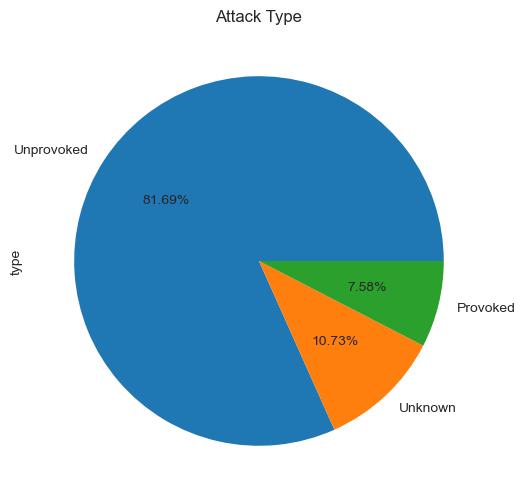

In [54]:
df2["attack_type"].value_counts().plot.pie(autopct="%.2f%%", ylabel = "type", figsize = (6,6), title = "Attack Type")

<Axes: title={'center': 'Attacks pro Activity'}, xlabel='activity'>

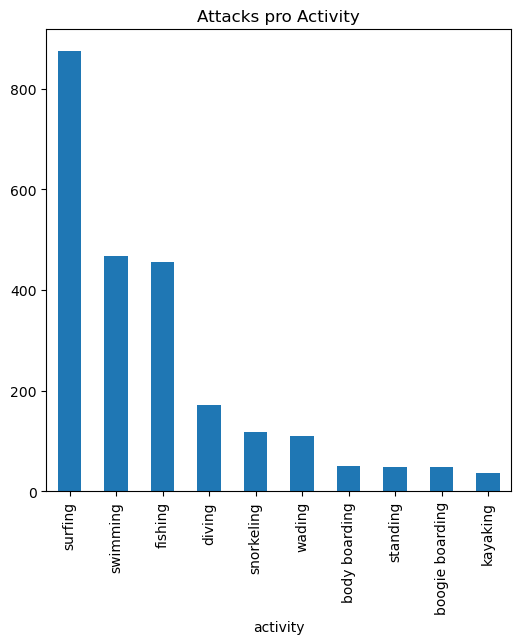

In [49]:
df2["activity"].value_counts().plot.bar(figsize = (6,6), title = "Attacks pro Activity")

<Axes: ylabel='Sex'>

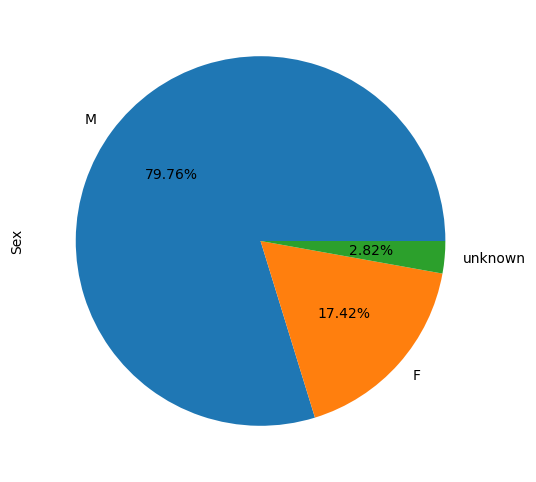

In [48]:
df2["sex"].value_counts().plot.pie(autopct="%.2f%%", ylabel = "Sex", figsize = (6,6))

<Axes: title={'center': 'Body Part'}, xlabel='body_part'>

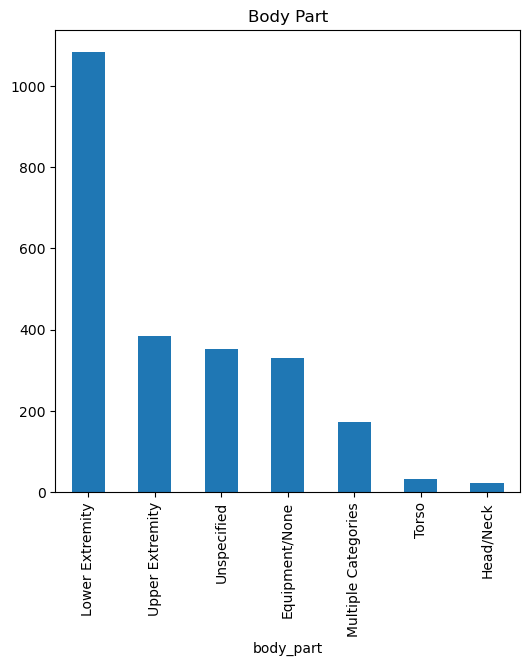

In [47]:
df2["body_part"].value_counts().plot.bar(figsize = (6,6), title = "Body Part")

In [216]:
df2.to_excel(r"c:\\Users\\eymem\\Documents\\GitHub\\SharkAttacks\\Project_Sharkattacks.xlsx",index=False)

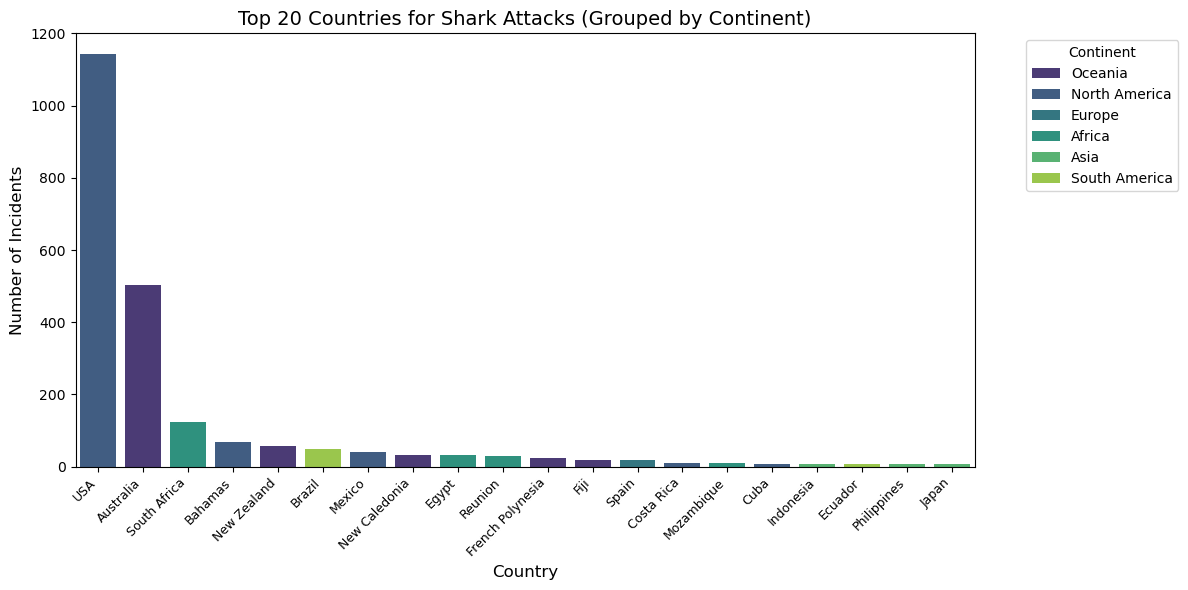

In [28]:
top_20_names = df2['country'].value_counts().nlargest(20).index
# Filter the main dataframe to only these countries
df_plot = df2[df2['country'].isin(top_20_names)]

plt.figure(figsize=(12, 6))

# 2. Use countplot: it calculates the y-axis (counts) automatically
# We use 'hue' to group by continent and 'order' to keep the Top 20 ranking
sns.countplot(
    data=df_plot, 
    x='country', 
    hue='continent', 
    order=top_20_names,
    palette='viridis',
    dodge=False  # Keeps bars centered on the tick
)

# 3. Formatting
plt.title('Top 20 Countries for Shark Attacks (Grouped by Continent)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', labelsize=9)

# Move legend outside so it doesn't block the bars
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

/var/folders/kl/0dt766hd3b37x_5szjj7k7yw0000gn/T/ipykernel_5458/2857751291.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


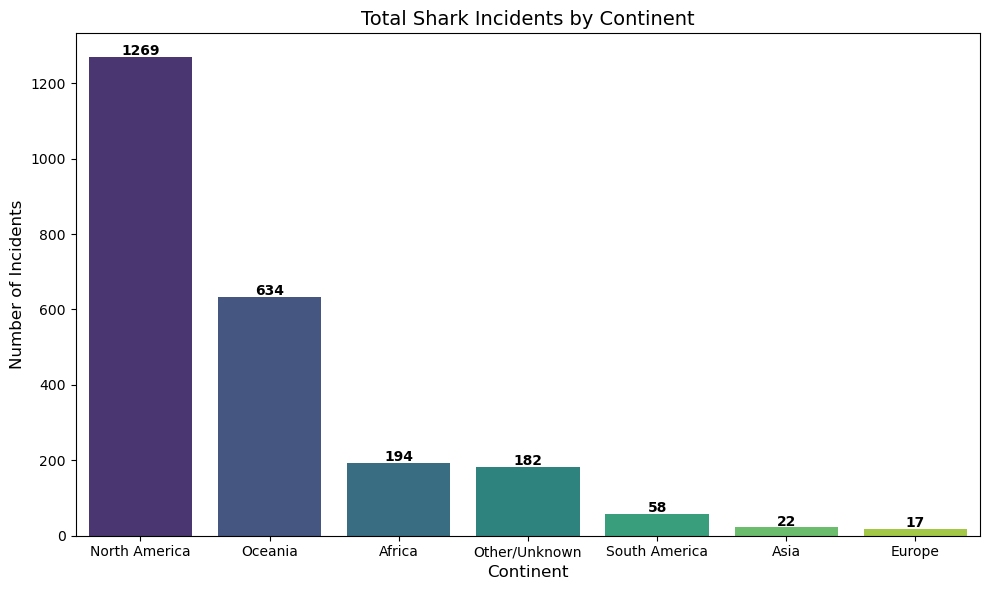

In [29]:
# 1. Count incidents per continent
continent_counts = df2['continent'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))

# 2. Create the bar graphic
sns.barplot(
    x=continent_counts.index, 
    y=continent_counts.values, 
    palette='viridis'
)

# 3. Add labels and title
plt.title('Total Shark Incidents by Continent', fontsize=14)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)

# Optional: Add the exact count on top of each bar
for i, value in enumerate(continent_counts.values):
    plt.text(i, value + 5, str(value), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()